In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATASET_PATH = r"C:\Users\mariam mohamed\Downloads\Rotten_Tomato_Detection\two_classes"
IMG_SIZE = 64
data = []
labels = []
categories = {"Fresh": 1, "Rotten": 0}



for category, label in categories.items():
    folder_path = os.path.join(DATASET_PATH, category)

    if not os.path.exists(folder_path):
        print(f"\nERROR: Could not find folder '{category}'")
        continue

    # Get list of files
    file_names = os.listdir(folder_path)
    print(f"\nFound folder: {category}")
    print(f"   -> Contains {len(file_names)} files")

    count = 0
    for filename in file_names:
        img_path = os.path.join(folder_path, filename)

        # Read and Resize
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            flat_pixels = img.flatten()
            data.append(flat_pixels)
            labels.append(label)
            count += 1

    print(f"Data loaded {count} images from {category}")
df = pd.DataFrame(data)
df['label'] = labels
print(df['label'].value_counts())


Found folder: Fresh
   -> Contains 1421 files
Data loaded 1421 images from Fresh

Found folder: Rotten
   -> Contains 793 files
Data loaded 793 images from Rotten
label
1    1421
0     793
Name: count, dtype: int64


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,40,34,37,38,36,42,44,38,43,59,...,49,47,48,51,46,52,50,46,47,1
1,47,45,46,45,46,49,54,53,52,59,...,46,45,50,46,46,46,51,46,52,1
2,60,54,54,62,58,58,66,65,67,74,...,59,59,62,59,58,64,59,58,67,1
3,61,60,64,64,65,57,74,68,73,79,...,63,62,63,68,62,61,65,60,67,1
4,29,30,34,30,30,33,32,31,36,42,...,40,41,46,37,40,45,37,41,42,1


In [5]:
df.shape

(2214, 12289)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Columns: 12289 entries, 0 to label
dtypes: int64(1), uint8(12288)
memory usage: 26.0 MB


In [7]:
X = df.drop('label', axis=1)
y = df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled

array([[-1.09177233, -0.93078986, -0.790257  , ..., -0.50213422,
        -0.35627604, -0.56915981],
       [-0.64857349, -0.55624909, -0.64435706, ..., -1.07682706,
        -0.96779461, -0.78085404],
       [-1.01790585, -0.93078986, -1.30090678, ..., -1.99633561,
        -2.06852805, -2.26271358],
       ...,
       [-0.72243996, -0.63115724, -0.86320697, ..., -0.15731852,
         0.01063511, -0.14577137],
       [-0.13150818,  0.1179243 , -0.13370728, ..., -0.84694993,
        -0.72318718, -0.99254826],
       [ 1.2719548 ,  1.54117923,  0.81464231, ...,  0.5323129 ,
         1.11136854,  1.33608817]], shape=(1771, 12288))

In [11]:
X_test_scaled

array([[-0.94403938, -0.78097355, -0.790257  , ..., -0.50213422,
        -0.72318718, -0.67500693],
       [-1.23950527, -1.08060617, -1.15500684, ..., -1.53658134,
        -1.21240204, -0.99254826],
       [ 0.75488949,  0.49246507,  0.5957924 , ...,  0.41737433,
         0.25524254,  0.17176996],
       ...,
       [ 2.15835248,  2.06553631,  2.2006917 , ...,  2.14145286,
         2.21210198,  2.07701794],
       [ 1.34582127,  1.39136292,  1.47119202, ...,  1.68169858,
         1.96749455,  1.75947661],
       [ 0.16395771,  0.26774061,  0.01219265, ..., -0.38719565,
        -0.35627604, -0.56915981]], shape=(443, 12288))

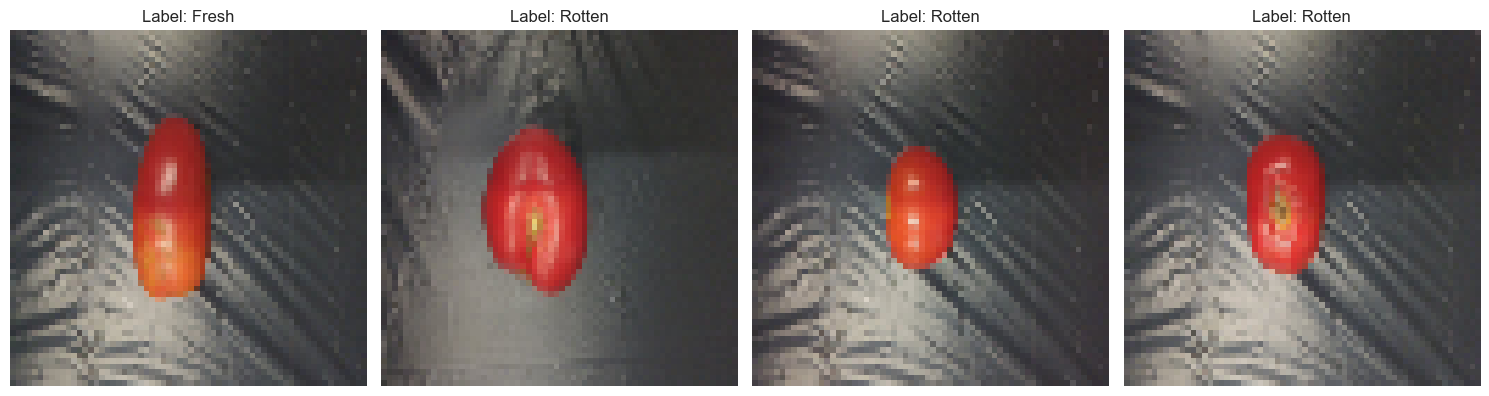

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define Label Map (0 = Rotten, 1 = Fresh)
label_names = {0: "Rotten", 1: "Fresh"}

# 2. Pick 4 random rows from the dataframe
sample_rows = df.sample(4)

# 3. Create a figure to display them
plt.figure(figsize=(15, 5))

for i, (index, row) in enumerate(sample_rows.iterrows()):
    # Create subplot (1 row, 4 columns)
    plt.subplot(1, 4, i + 1)

    # Get the label
    label_val = int(row['label'])
    label_text = label_names[label_val]

    # Get the pixels (Drop the 'label' column to get just pixel data)
    flat_pixels = row.drop('label').values

    # Reshape back to Image: (64 height, 64 width, 3 color channels)
    # We use .astype('uint8') to make sure matplotlib treats them as valid image data
    image_reshaped = flat_pixels.reshape(64, 64, 3).astype('uint8')

    # Display
    plt.imshow(image_reshaped)
    plt.title(f"Label: {label_text}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
log_reg = LogisticRegression(C = 1, max_iter = 2000, solver = 'lbfgs', random_state=42)

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

In [14]:
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rotten', 'Fresh']))


Model Accuracy: 85.55%

Classification Report:
              precision    recall  f1-score   support

      Rotten       0.79      0.82      0.80       160
       Fresh       0.90      0.87      0.89       283

    accuracy                           0.86       443
   macro avg       0.84      0.85      0.85       443
weighted avg       0.86      0.86      0.86       443



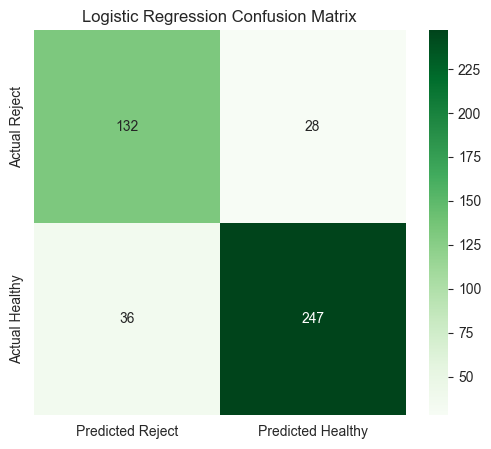

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Reject', 'Predicted Healthy'],
            yticklabels=['Actual Reject', 'Actual Healthy'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# **kmeans model**

In [16]:
# ======================
# Improved K-Means Model
# ======================

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit improved K-Means
kmeans = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=50,       # Higher number = more stable clustering
    max_iter=1000,
    random_state=42
)

kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Convert cluster numbers to actual class labels
# Find the most common real label inside each cluster
mapping = {}
for cluster_id in np.unique(clusters):
    true_labels = y[clusters == cluster_id]
    mapped_label = np.bincount(true_labels).argmax()
    mapping[cluster_id] = mapped_label

# Apply mapping
y_pred_kmeans = np.array([mapping[c] for c in clusters])

# Calculate accuracy
accuracy_kmeans = accuracy_score(y, y_pred_kmeans)

print(f"K-Means Accuracy: {accuracy_kmeans * 100:.2f}%")
print("Cluster Mapping:", mapping)


K-Means Accuracy: 68.02%
Cluster Mapping: {np.int32(0): np.int64(0), np.int32(1): np.int64(1)}


In [17]:
cm_k = confusion_matrix(y, y_pred_kmeans)


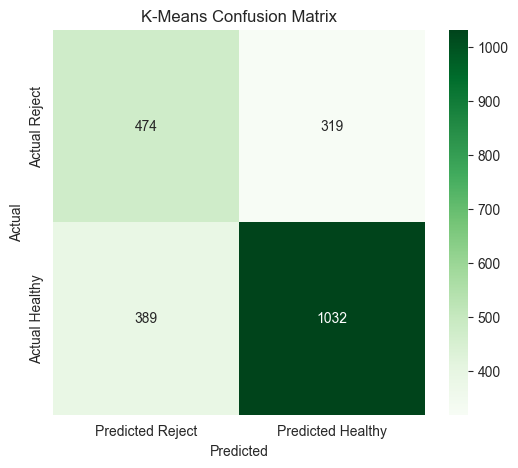

In [18]:
# ============================
# K-Means Confusion Matrix (Heatmap)
# ============================

plt.figure(figsize=(6, 5))
sns.heatmap(cm_k, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Reject', 'Predicted Healthy'],
            yticklabels=['Actual Reject', 'Actual Healthy'])

plt.title('K-Means Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
